In [1]:
from cmath import exp
from math import pi
import time
import matplotlib.pyplot as plt
import numpy as np

In [2]:
class RootsOfUnity:
    """
    klasa odpowiadająca za Roots of unity
    """
    def __init__(self, n, k = 1):
        self.k = k
        self.n = n

    def __pow__(self, rest):
        if type(rest) is int:
            n = RootsOfUnity(self.n, self.k * rest)
            return n

    def __eq__(self, rest):
        if rest == 1:
            return abs(self.n) == abs(self.k)

    def __mul__(self, rest):
        return exp(2*1j*pi*self.k/self.n)*rest

    @property
    def ret_prop(self):
        return abs(self.n // self.k)

In [3]:
def FFT(A, w):
    """
    funkcja wykonująca szybką transformację Fouriera
    złożoność O(log(N))
    """
    if w == 1:
        return [sum(A)]
    B = [[],[]]
    i = 0
    for a in A:
        B[i%2].append(a)
        i+=1
    #do pierwszej czesci B dodajemy parzyste, do drugiej nieparzyste części A
    
    o2 = w**2
    
    C1 = FFT(B[0], o2)
    C2 = FFT(B[1], o2)
    C3 = [0]*w.ret_prop

    for i in range(w.ret_prop//2):
        C3[i] = C1[i] + w**i * C2[i]
        C3[i+w.ret_prop//2] = C1[i] - w**i * C2[i]
        
    return C3

In [4]:
def FPM(A,B):
    """
    funkcja wykorzystująca FFT do mnożenia dwóch tablic zawierających współczynniki wielomianów
    złożoność O(Nlog(N))
    """
    n = 1<<(len(A)+len(B)-2).bit_length()
    o = RootsOfUnity(n)
    
    AT = FFT(A, o)
    BT = FFT(B, o)
    
    C = [AT[i]*BT[i] for i in range(n)]

    D = [int((a/n).real) for a in FFT(C, o ** -1)]
    while True:
        if D[-1] != 0:
            return D
        else:
            del D[-1]

In [5]:
FPM([1,5], [1, -3])

[1, 2, -15]

In [6]:
n = 10
time_meas = []
n_of_meas = []    
"""
pętla do mierzenia złożoności obliczeniowej
"""
while n < 1000:
    Aval = np.random.randint(10, size=n)
    Bval = np.random.randint(10, size=n)
    start = time.time()
    FPM(Aval, Bval)
    time_meas.append(-(start - time.time()))
    n_of_meas.append(n)
    n+=10

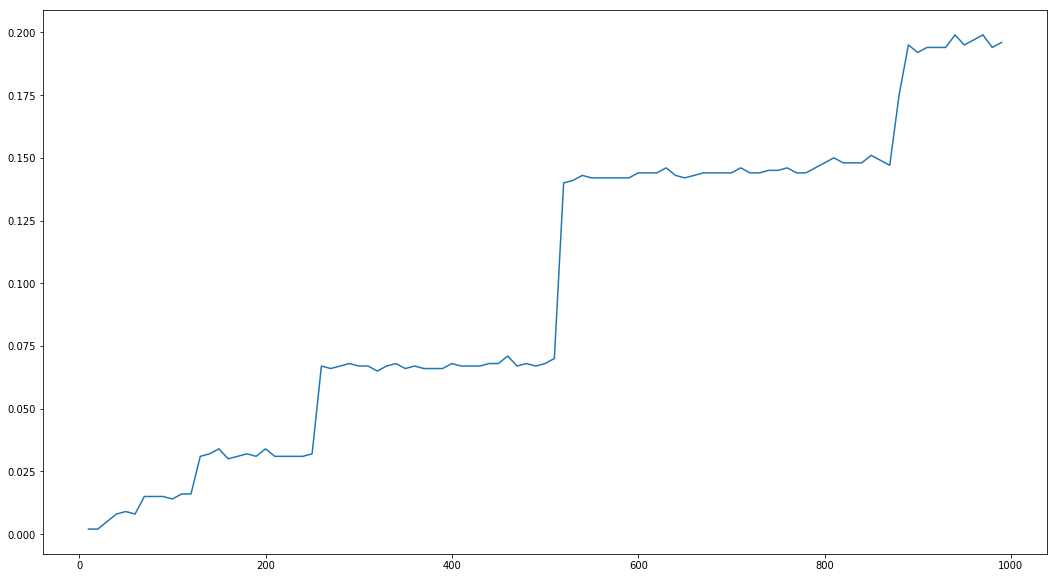

In [7]:
fig = plt.figure()
fig.set_size_inches(18,10)
plt.plot(n_of_meas, time_meas)